In [ ]:
# ==============================================================
#  TRACE FINDER - MODEL TRAINING NOTEBOOK
#  Purpose: Train ML models to identify scanner source
#  Author: Rohan Raj
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load dataset
csv_path = r"D:\jupyter\Datasets\image_features.csv"
df = pd.read_csv(csv_path)

# Display dataset information
print("✅ Dataset loaded successfully!")
print("Total Samples:", len(df))
df.info()

from IPython.display import display, HTML
display(HTML(df.to_html()))


✅ Dataset loaded successfully!
Total Samples: 2200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       2200 non-null   object 
 1   class_label     2200 non-null   object 
 2   width           2200 non-null   int64  
 3   height          2200 non-null   int64  
 4   aspect_ratio    2200 non-null   float64
 5   file_size_kb    2200 non-null   float64
 6   mean_intensity  2200 non-null   float64
 7   std_intensity   2200 non-null   float64
 8   skewness        2200 non-null   float64
 9   kurtosis        2200 non-null   float64
 10  entropy         2200 non-null   float64
 11  edge_density    2200 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 206.4+ KB


,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_65.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.968555,0.108596,-3.867943,14.640203,0.983374,0.118984
1,s1_67.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.915402,0.122620,-1.691106,4.380340,2.474652,0.050934
2,s1_80.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.982059,0.072158,-5.302385,32.579271,0.895837,0.094772
3,s1_83.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.978163,0.081183,-4.303663,19.361899,0.857632,0.121933
4,s1_88.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.981119,0.076877,-4.940507,27.130063,0.741647,0.081158
5,s1_93.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.981709,0.080151,-5.171780,28.935158,0.669140,0.087044
6,s1_96.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.981756,0.090936,-5.698791,33.467322,0.552192,0.065681
7,s1_98.tif,Official-20251101T040400Z-1-001,512,512,1.0,25495.067383,0.959946,0.101954,-2.896911,8.245970,1.521030,0.235271
8,s2_26.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.985005,0.073784,-6.012062,40.317568,0.561350,0.074409
9,s2_33.tif,Official-20251101T040400Z-1-001,512,512,1.0,6366.801758,0.962065,0.105946,-3.222510,10.433075,1.364197,0.210064


In [ ]:
# Check for missing values
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

# Data types summary
print("\n📊 Dataset Info:")
df.info()



🔍 Checking for missing values:
file_name         0
class_label       0
width             0
height            0
aspect_ratio      0
file_size_kb      0
mean_intensity    0
std_intensity     0
skewness          0
kurtosis          0
entropy           0
edge_density      0
dtype: int64

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       2200 non-null   object 
 1   class_label     2200 non-null   object 
 2   width           2200 non-null   int64  
 3   height          2200 non-null   int64  
 4   aspect_ratio    2200 non-null   float64
 5   file_size_kb    2200 non-null   float64
 6   mean_intensity  2200 non-null   float64
 7   std_intensity   2200 non-null   float64
 8   skewness        2200 non-null   float64
 9   kurtosis        2200 non-null   float64
 10  entropy         2200 non-null   float64
 11  e

In [ ]:
# Encode class labels (scanner models)
le = LabelEncoder()
df['class_label_encoded'] = le.fit_transform(df['class_label'])

# Separate features and target
X = df.drop(columns=['file_name', 'class_label', 'class_label_encoded'])
y = df['class_label_encoded']

# Feature scaling (important for SVM/Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features and labels prepared successfully!")
print("Feature shape:", X_scaled.shape)
print("Unique classes:", le.classes_)


✅ Features and labels prepared successfully!
Feature shape: (2200, 10)
Unique classes: ['Official-20251101T040400Z-1-001' 'Official-20251101T040400Z-1-002'
 'Official-20251101T040400Z-1-003' 'Official-20251101T040400Z-1-004'
 'Official-20251101T040400Z-1-005' 'Official-20251101T040400Z-1-006'
 'Official-20251101T040400Z-1-007' 'Official-20251101T040400Z-1-008'
 'Official-20251101T040400Z-1-009' 'Official-20251101T040400Z-1-010'
 'Official-20251101T040400Z-1-011' 'Official-20251101T040400Z-1-012'
 'Official-20251101T040400Z-1-013' 'Official-20251101T040400Z-1-014']


In [ ]:
# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train/Test Split Complete")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


✅ Train/Test Split Complete
Training Samples: 1760
Testing Samples: 440


In [ ]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n🔹 {name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



🔹 Random Forest Accuracy: 24.55%
                                 precision    recall  f1-score   support

Official-20251101T040400Z-1-001       0.45      0.47      0.46        62
Official-20251101T040400Z-1-002       0.31      0.37      0.34        43
Official-20251101T040400Z-1-003       0.17      0.20      0.18        25
Official-20251101T040400Z-1-004       0.18      0.20      0.19        46
Official-20251101T040400Z-1-005       0.20      0.16      0.18        25
Official-20251101T040400Z-1-006       0.18      0.15      0.16        39
Official-20251101T040400Z-1-007       0.21      0.22      0.21        37
Official-20251101T040400Z-1-008       0.00      0.00      0.00        21
Official-20251101T040400Z-1-009       0.17      0.14      0.15        29
Official-20251101T040400Z-1-010       0.08      0.07      0.08        28
Official-20251101T040400Z-1-011       0.18      0.18      0.18        28
Official-20251101T040400Z-1-012       0.45      0.54      0.49        35
Official-2025110

C:\Users\rraj2\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rraj2\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rraj2\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

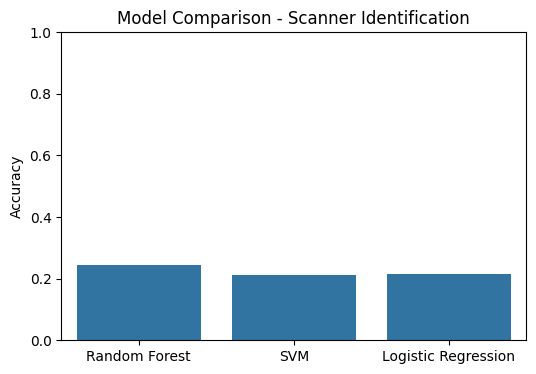

In [ ]:
# Compare model performance
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Comparison - Scanner Identification")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()



🏆 Best Model: Random Forest


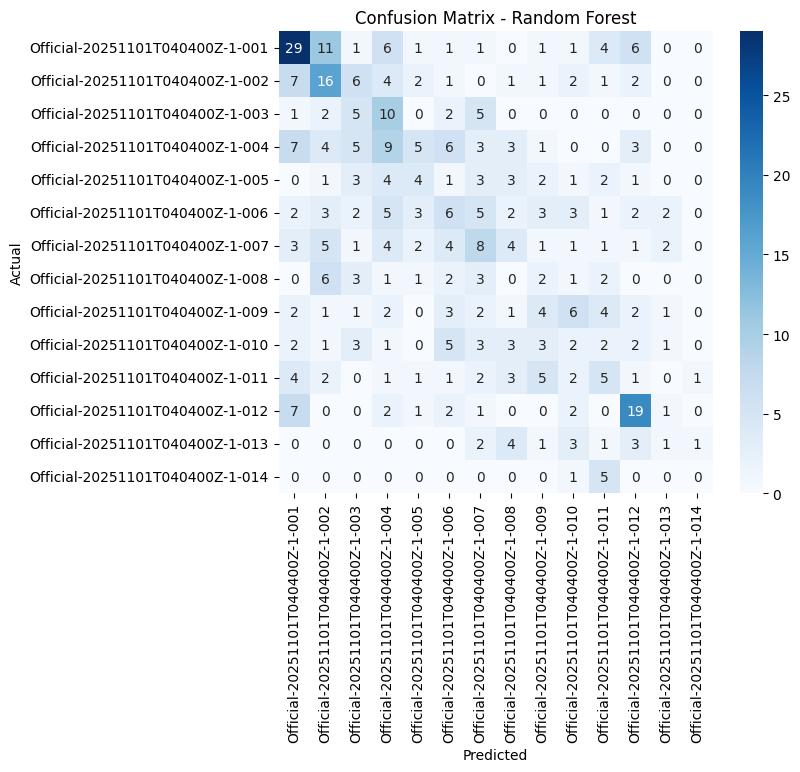

In [ ]:
# Choose best model (highest accuracy)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")

# Confusion matrix
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


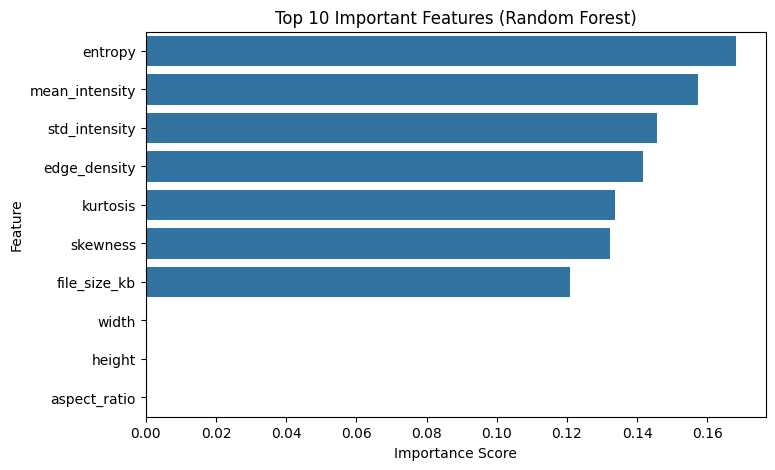

In [ ]:
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    feature_names = X.columns

    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
    plt.title("Top 10 Important Features (Random Forest)")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()
